In [142]:
import pandas as pd
import numpy as np
import sklearn as sk
import math as math
import pandas_datareader as pdr
import datetime as dt
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
end = dt.datetime(2023, 9, 18)
start = end - dt.timedelta(days=8661, seconds=81580, microseconds=640996)

In [52]:
start, end

(datetime.datetime(1999, 12, 31, 1, 20, 19, 359004),
 datetime.datetime(2023, 9, 18, 0, 0))

In [68]:
### FAANG stocks
stocks = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]
stocks

['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']

In [83]:
df_stocks = yf.download(stocks, start, end)

[*********************100%%**********************]  5 of 5 completed


In [85]:
df_stocks.head()

Adj Close                               Close                       \
                AAPL      AMZN GOOGL META NFLX      AAPL      AMZN GOOGL META   
Date                                                                            
1999-12-31  0.779169  3.806250   NaN  NaN  NaN  0.917969  3.806250   NaN  NaN   
2000-01-03  0.848323  4.468750   NaN  NaN  NaN  0.999442  4.468750   NaN  NaN   
2000-01-04  0.776801  4.096875   NaN  NaN  NaN  0.915179  4.096875   NaN  NaN   
2000-01-05  0.788168  3.487500   NaN  NaN  NaN  0.928571  3.487500   NaN  NaN   
2000-01-06  0.719961  3.278125   NaN  NaN  NaN  0.848214  3.278125   NaN  NaN   

                 ...      Open                               Volume  \
           NFLX  ...      AAPL      AMZN GOOGL META NFLX       AAPL   
Date             ...                                                  
1999-12-31  NaN  ...  0.901228  3.965625   NaN  NaN  NaN  163811200   
2000-01-03  NaN  ...  0.936384  4.075000   NaN  NaN  NaN  535796800   
2000-01-04  NaN  ...  0.966518  4.268750   NaN  NaN  NaN  512377600   
2000-01-05  NaN  ...  0.926339  3.525000   NaN  NaN  NaN  778321600   
2000-01-06  NaN  ...  0.947545  3.565625   NaN  NaN  NaN  767972800   

                                       
                 AMZN GOOGL META NFLX  
Date                                   
1999-12-31  145414000   NaN  NaN  NaN  
2000-01-03  322352000   NaN  NaN  NaN  
2000-01-04  349748000   NaN  NaN  NaN  
2000-01-05  769148000   NaN  NaN  NaN  
2000-01-06  375040000   NaN  NaN  NaN  

[5 rows x 30 columns]

In [89]:
df_stocks.index
df_stocks.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'NFLX'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'NFLX'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'NFLX'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'NFLX'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'NFLX'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'AMZN'),
            (   'Volume', 'G

In [104]:
close = df_stocks.Close
close = close.dropna()
close.head()

,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2012-05-18,18.942142,10.6925,15.025025,38.230000,9.994286
2012-05-21,20.045713,10.9055,15.368118,34.029999,10.248571
2012-05-22,19.891787,10.7665,15.035035,31.000000,9.672857
2012-05-23,20.377144,10.8640,15.251752,32.000000,10.272857
2012-05-24,20.190001,10.7620,15.106607,33.029999,10.038571


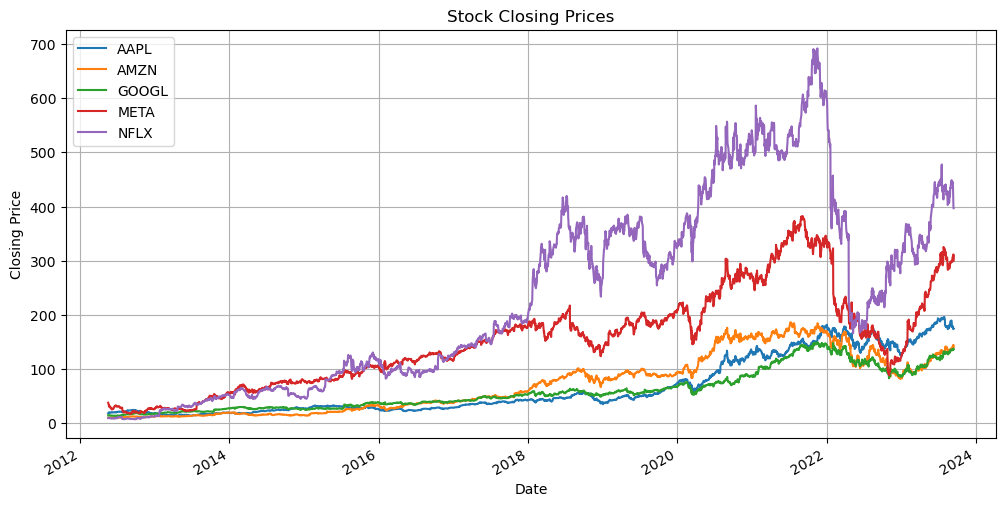

In [105]:
close.plot(figsize=(12, 6))
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [279]:
#### FAMA FRENCH DATA
ff = pd.read_csv('/Users/jackconnors/Downloads/F-F_Research_Data_Factors-3.csv')

In [280]:
ff['date'] = pd.to_datetime(ff['date'], format='%Y%m')

In [281]:
ff.rename(columns={'date': 'Date'}, inplace=True)

In [282]:
ff.head()

,Date,MKT,SMB,HML,RF
0,1926-07-01,2.96,-2.38,-2.73,0.22
1,1926-08-01,2.64,-1.47,4.14,0.25
2,1926-09-01,0.36,-1.39,0.12,0.23
3,1926-10-01,-3.24,-0.13,0.65,0.32
4,1926-11-01,2.53,-0.16,-0.38,0.31


In [283]:
merged_df = close.merge(ff, on='Date', how='inner')

In [284]:
merged_df.head()

,Date,AAPL,AMZN,GOOGL,META,NFLX,MKT,SMB,HML,RF
0,2012-06-01,20.035357,10.4110,14.288789,27.719999,8.992857,3.89,0.64,0.59,0.00
1,2012-08-01,21.671785,11.6045,15.832833,20.879999,7.785714,2.55,0.48,1.30,0.01
2,2012-10-01,23.549643,12.6005,19.063564,21.990000,8.007143,-1.76,-1.17,3.56,0.01
3,2012-11-01,21.305000,11.6070,17.206957,21.209999,11.098571,0.78,0.61,-0.83,0.01
4,2013-02-01,16.200714,13.2500,19.409409,29.730000,23.542856,1.29,-0.33,0.10,0.00


In [285]:
# Calculate monthly returns for each stock
for stock_symbol in ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']:
    merged_df[f'{stock_symbol}_Return'] = merged_df[stock_symbol].pct_change()

# Drop the first row as it will have NaN values due to no previous month for the first month
merged_df = merged_df.dropna().reset_index(drop=True)

In [ ]:
### ANALYSIS OF VARIANCE ###

In [334]:
stock_symbols = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']

In [335]:
risk_return_df = pd.DataFrame(columns=['Stock Symbol', 'Expected Return', 'Risk'])

In [336]:
# Calculate mean (expected return) and standard deviation (risk) for each stock's returns
for stock_symbol in stock_symbols:
    returns_col = f'{stock_symbol}_Return'
    expected_return = merged_df[returns_col].mean()
    risk = merged_df[returns_col].std()
    risk_return_df = risk_return_df.append({'Stock Symbol': stock_symbol, 'Expected Return': expected_return, 'Risk': risk}, ignore_index=True)

/var/folders/78/lyg5vs3x05n9nf7j9ttzb0yc0000gn/T/ipykernel_2060/4011730369.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  risk_return_df = risk_return_df.append({'Stock Symbol': stock_symbol, 'Expected Return': expected_return, 'Risk': risk}, ignore_index=True)
/var/folders/78/lyg5vs3x05n9nf7j9ttzb0yc0000gn/T/ipykernel_2060/4011730369.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  risk_return_df = risk_return_df.append({'Stock Symbol': stock_symbol, 'Expected Return': expected_return, 'Risk': risk}, ignore_index=True)
/var/folders/78/lyg5vs3x05n9nf7j9ttzb0yc0000gn/T/ipykernel_2060/4011730369.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  risk_return_df = risk_return_df.append({'Stock Symbol': stock_symbol, 'E

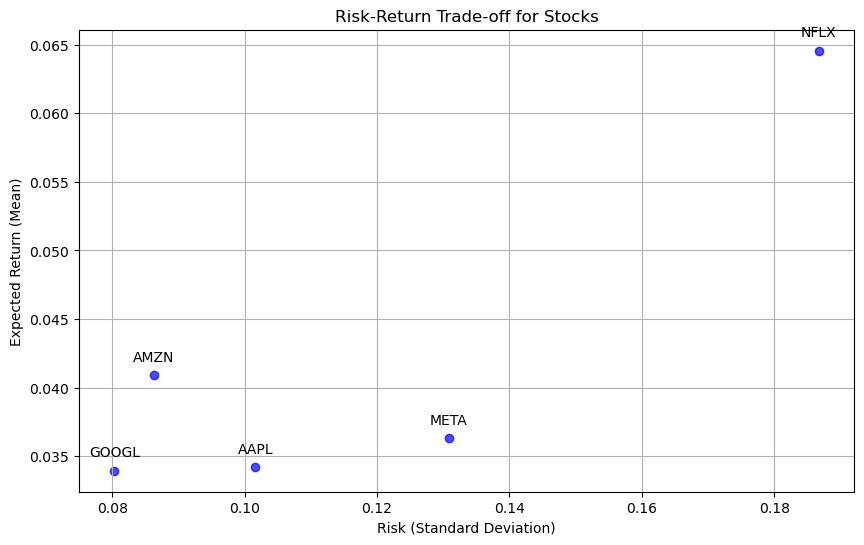

In [339]:
plt.figure(figsize=(10, 6))
plt.scatter(risk_return_df['Risk'], risk_return_df['Expected Return'], marker='o', color='b', alpha=0.7)
plt.title('Risk-Return Trade-off for Stocks')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return (Mean)')
plt.grid(True)
for i, stock_symbol in enumerate(risk_return_df['Stock Symbol']):
    plt.annotate(stock_symbol, (risk_return_df['Risk'][i], risk_return_df['Expected Return'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [287]:
merged_df['MKT'] = merged_df['MKT'] / 100
merged_df['SMB'] =merged_df['SMB']/ 100
merged_df['HML'] =merged_df['HML']/ 100
merged_df['RF']=merged_df['RF'] / 100

In [288]:
### change stock returns into excess stock returns
for stock_symbol in ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']:
    merged_df[f'{stock_symbol}_Excess_Return'] = merged_df[f'{stock_symbol}_Return'] - merged_df['RF']

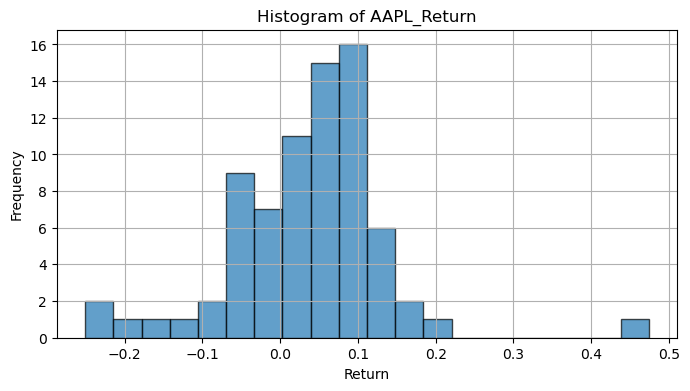

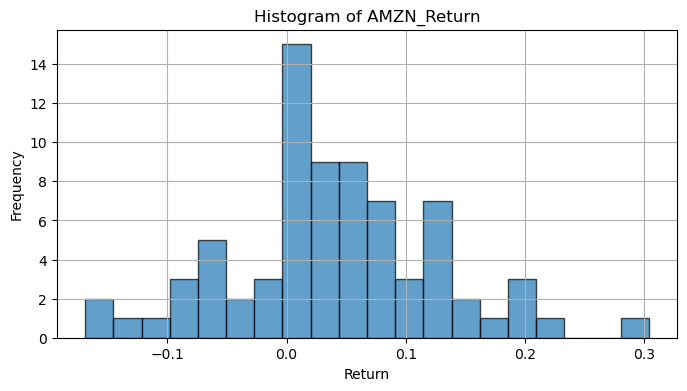

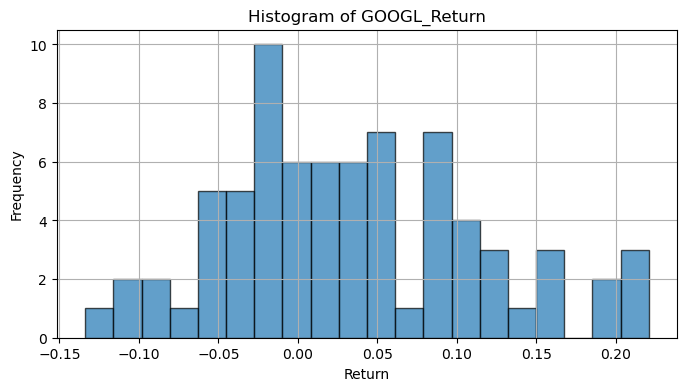

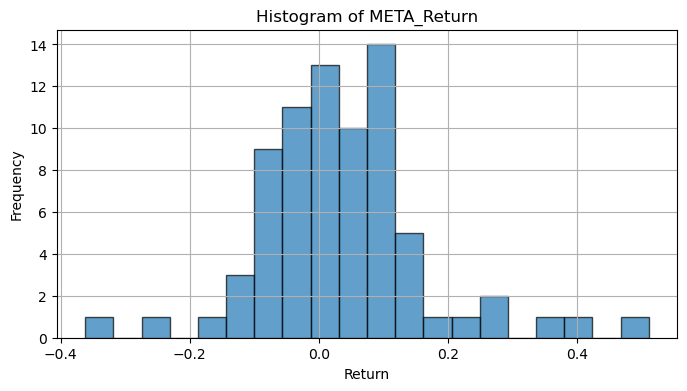

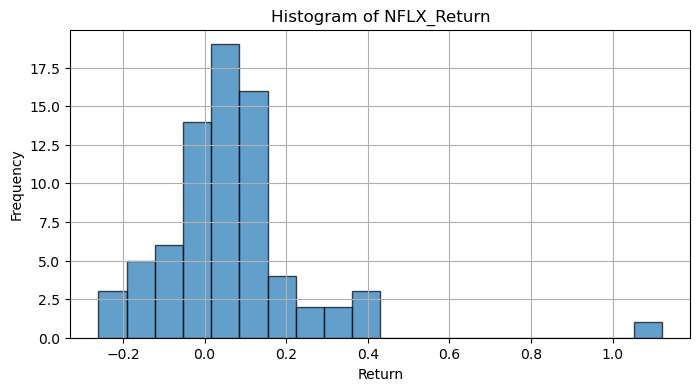

In [289]:
stock_columns = ['AAPL_Return', 'AMZN_Return', 'GOOGL_Return', 'META_Return', 'NFLX_Return']

# Loop through each stock column and create a histogram
for stock_col in stock_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(merged_df[stock_col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {stock_col}')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [290]:
### CAPM Regression ###
X = merged_df['MKT']
y = merged_df['NFLX_Excess_Return']

In [291]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [292]:
model = sm.OLS(y, X)

In [293]:
results = model.fit()

In [294]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     NFLX_Excess_Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                  0.002937
Date:                Wed, 20 Sep 2023   Prob (F-statistic):              0.957
Time:                        16:32:49   Log-Likelihood:                 19.896
No. Observations:                  75   AIC:                            -35.79
Df Residuals:                      73   BIC:                            -31.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.023      2.738      0.0

In [295]:
### fama french model ###
X_ff = merged_df[['MKT', 'HML', "SMB"]]
y_ff = merged_df['NFLX_Excess_Return']

In [296]:
X_ff = sm.add_constant(X_ff)

In [297]:
model = sm.OLS(y_ff, X_ff)

In [298]:
results = model.fit()

In [299]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     NFLX_Excess_Return   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.1880
Date:                Wed, 20 Sep 2023   Prob (F-statistic):              0.904
Time:                        16:33:02   Log-Likelihood:                 20.191
No. Observations:                  75   AIC:                            -32.38
Df Residuals:                      71   BIC:                            -23.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0627      0.024      2.667      0.0

In [313]:
### META CAPM Regression ###
X = merged_df['MKT']
y = merged_df['META_Excess_Return']

In [302]:
X = sm.add_constant(X)

In [303]:
model = sm.OLS(y, X)

In [304]:
results = model.fit()

In [305]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     META_Excess_Return   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     3.987
Date:                Wed, 20 Sep 2023   Prob (F-statistic):             0.0496
Time:                        16:35:38   Log-Likelihood:                 48.556
No. Observations:                  75   AIC:                            -93.11
Df Residuals:                      73   BIC:                            -88.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0472      0.016      2.975      0.0

In [314]:
### META FF ###
X_ff = merged_df[['MKT', 'HML', 'SMB']]
y_ff = merged_df['META_Excess_Return']

In [308]:
X_ff = sm.add_constant(X)

In [309]:
model = sm.OLS(y_ff, X_ff)

In [310]:
results = model.fit()

In [312]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     META_Excess_Return   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.596
Date:                Wed, 20 Sep 2023   Prob (F-statistic):             0.0591
Time:                        16:37:27   Log-Likelihood:                 50.464
No. Observations:                  75   AIC:                            -92.93
Df Residuals:                      71   BIC:                            -83.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0476      0.016      3.031      0.0

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [316]:
LR = LinearRegression()

In [318]:
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [331]:
prediction = LR.predict(X_test.values.reshape(-1,1))

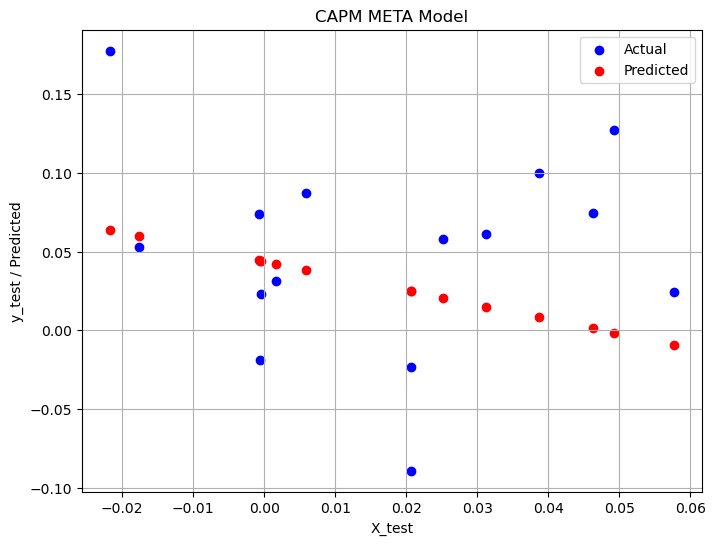

In [332]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, prediction, color='red', label='Predicted')
plt.title('CAPM META Model')
plt.xlabel('X_test')
plt.ylabel('y_test / Predicted')
plt.legend()
plt.grid(True)
plt.show()